In [1]:
import tensorflow as tf 
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import math
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loads and read csv file
df_original=pd.read_csv("Data/Churn_Modelling.csv",delimiter=",")
df =df_original
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# checks data types of columns
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# checks for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# checks for duplicate values
df.duplicated().sum()

0

In [8]:
# display column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# display shape of the dataframe
df.shape

(10000, 14)

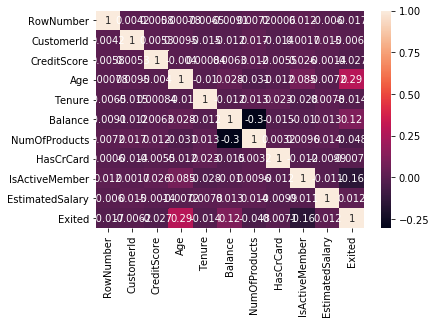

In [10]:
# checks correlation with all columns
corr=df.corr()
sb.heatmap(corr,annot=True)

In [11]:
# checks correlation with all columns
print(corr['Exited'].sort_values(ascending=True)[:])

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64


In [12]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

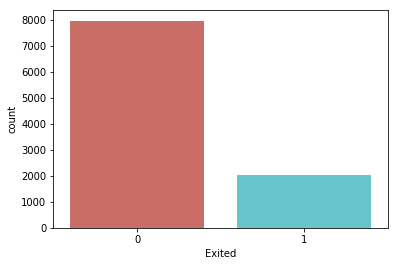

In [13]:
sb.countplot(x='Exited',data=df,palette='hls')

In [14]:
df.shape

(10000, 14)

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# split dataset into train and test
train,test = train_test_split(df,test_size=0.2)


In [17]:
# saving test data into csv file
test.to_csv('test_file.csv',index=False,encoding='utf-8')

In [18]:
# split train data into train and cross validation dataset
train_data,cross_val = train_test_split(train,test_size=0.2,random_state=0)

In [19]:
# seperating features and labels from dataset
# Credit Score through Estimated Salary
x_train = train_data.iloc[:,3:13].values
# Exited
y_train = train_data.iloc[:,13].values


In [20]:
x_train.shape,y_train.shape

((6400, 10), (6400,))

In [21]:

def categorical_encode(x):
   # Encoding categorical data country
    labelencoder_x_country = LabelEncoder()
    x[:,1] = labelencoder_x_country.fit_transform(x[:,1])
    # Encode categorical data gender
    labelencoder_x_gender = LabelEncoder()
    x[:,2]  =  labelencoder_x_gender.fit_transform(x[:,2])
    
    # Converting the string features into their own dimensions
    # Gender doesn't matter here because its binary
    OneHot_country = OneHotEncoder(categorical_features=[1]) # 1 is the country column
    x = OneHot_country.fit_transform(x).toarray()
    x = x[:, 1:]
    return x

# Encoding categorical (string based) data.
x_train = categorical_encode(x_train)

In [22]:
# seperating features and labels from dataset of cross validation dataset
# Credit Score through Estimated Salary
x_cv = cross_val.iloc[:,3:13].values
# Exited
y_cv = cross_val.iloc[:,13].values


In [23]:
# # Encoding categorical (string based) data.
x_cv = categorical_encode(x_cv)

In [24]:
# Feature Scaling on independent variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_cv = sc.transform(x_cv)

In [25]:
x_train.shape,y_train.shape,x_cv.shape,y_cv.shape

((6400, 11), (6400,), (1600, 11), (1600,))

In [26]:
import keras

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# Initializing the ANN
classifier = Sequential()

In [29]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(activation = 'relu', units=6, kernel_initializer='uniform')) 


In [31]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform')) 

In [32]:
# Compiling the Neural Network
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [33]:
# Fitting the Neural Network
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
6400/6400 [==============================] - 1s 114us/step - loss: 0.5044 - acc: 0.7942
Epoch 2/100
6400/6400 [==============================] - 0s 75us/step - loss: 0.4303 - acc: 0.7947
Epoch 3/100
6400/6400 [==============================] - 0s 77us/step - loss: 0.4246 - acc: 0.7989
Epoch 4/100
6400/6400 [==============================] - 1s 79us/step - loss: 0.4184 - acc: 0.8289
Epoch 5/100
6400/6400 [==============================] - 0s 74us/step - loss: 0.4126 - acc: 0.8309
Epoch 6/100
6400/6400 [==============================] - 0s 77us/step - loss: 0.4084 - acc: 0.8330
Epoch 7/100
6400/6400 [==============================] - 0s 75us/step - loss: 0.4049 - acc: 0.8364
Epoch 8/100
6400/6400 [==============================] - 0s 78us/step - loss: 0.4033 - acc: 0.8339
Epoch 9/100
6400/6400 [==============================] - 0s 75us/step - loss: 0.4011 - acc: 0.8370
Epoch 10/100
6400/6400 [==============================] - 0s

# Predicting on the Cross Validation dataset result
Testing the ANN

In [34]:
y_pred = classifier.predict(x_cv)
print(y_pred)

[[0.15060598]
 [0.0414083 ]
 [0.08369362]
 ...
 [0.4527338 ]
 [0.1075027 ]
 [0.02370316]]


To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.

In [35]:
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cv, y_pred)
print(cm)

[[1223   54]
 [ 217  106]]


In [37]:
print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')

83.0625 % of testing data was classified correctly


In [38]:
# calculating accuracy
print (accuracy_score(y_cv,y_pred)*100,'% of cross validation data was classified correctly')


83.0625 % of cross validation data was classified correctly


In [39]:
# save model in pickle file
import pickle
fileobj=open('save_model.pkl','wb')
pickle.dump(classifier,fileobj)
pickle.dump(sc,fileobj)
fileobj.close()